In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os
from boson_data_lib import *

In [2]:
#os.chdir(r"C:\Users\Zakhar\Documents\GitHub\POP23\TESTS")
#df = pd.read_pickle("dataframe_fidelity_tests_D20.pkl")

os.chdir("/home/zah/git/POP23/TESTS/")
#df = pd.read_pickle("dataframe_fidelity_tests_D20.pkl")
#df = pd.read_pickle("dataframe_fidelity_REG_tests_D20.pkl")
#df = pd.read_pickle("dataframe_fidelity_g_tests_D20.pkl")
df = pd.read_pickle("dataframe_fix-phase-reg001_fidelity__tests_D20.pkl")
df

,Gamma,State,Time,gt,Fidelity,Infidelity,Distance
0,0.079477,1,0.06000,0.004769,1.000000,3.219647e-15,0.341926
1,0.079477,1,0.08000,0.006358,1.000000,1.078078e-07,0.341926
2,0.079477,1,0.10000,0.007948,0.999999,7.800492e-07,0.341926
3,0.079477,1,0.12000,0.009537,1.000000,4.242807e-07,0.341926
4,0.079477,1,0.14000,0.011127,0.999998,1.506215e-06,0.341926
...,...,...,...,...,...,...,...
751,79.477,9,0.23800,18.915526,0.999327,6.729909e-04,0.277180
752,79.477,9,0.23825,18.935395,0.999326,6.743425e-04,0.277180
753,79.477,9,0.23850,18.955264,0.999324,6.755879e-04,0.277180
754,79.477,9,0.23875,18.975134,0.999323,6.767248e-04,0.277180


In [3]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

#df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
#df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
#df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
#df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
#df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

#df['Gamma'] = df['Gamma'].astype(float)

df['Infidelity'] = df['Infidelity'].abs()

df['Log_Infidelity'] = np.log10(df['Infidelity'])

df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

/home/zah/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
best_init_rho =  np.array([[ 0.96693975+0.j        , -0.17832301+0.00560344j],
                               [-0.17832301-0.00560344j,  0.03306025+0.j        ]])
data_dir = r"/home/zah/git/POP23/DATA/"
fid_dists = fidelity_distances(data_dir, best_init_rho);

/home/zah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


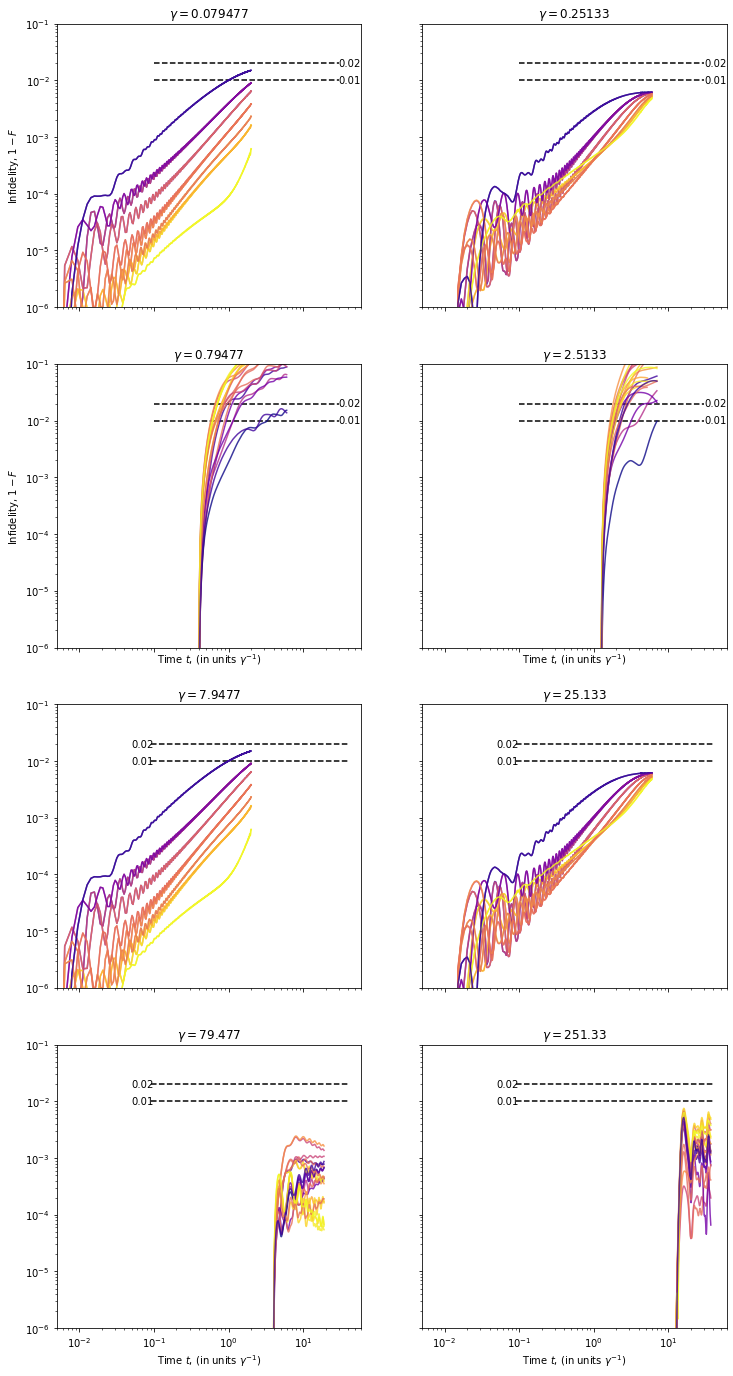

In [6]:
dfs = df

gamma = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

n = len(gamma)

fig, ax = plt.subplots(4, 2, figsize=(6*2, 6*4), sharey=True, sharex=True)

ax[0,0].set_ylim(1e-6, 1e-1)
ax[0,0].set_xlim(.5e-2, 60)


ax[0,0].set_ylabel(r"Infidelity, $1-F$")
ax[1,0].set_ylabel(r"Infidelity, $1-F$")

val = np.array(fid_dists) 
val -= val.min()
val /= val.max()

palette = 'plasma'
colors = plt.cm.get_cmap(palette)(val)[:,:3]

for i in range(2):
    for state in range(20):
        dfs = df[(df['Gamma'] == gamma[i])&(df['State'] == str(state+1))]
        x = np.array(dfs.get('gt'))
        y = np.array(dfs.get('Infidelity'))
        ax[0, i].loglog(x,y, color=colors[state], alpha=0.8)
        ax[0, i].set_title(r'$\gamma = $'+ gamma[i])
    ax[0, i].hlines(y=.02, xmin=1e-1, xmax=30, colors='black', linestyles='--')
    ax[0, i].text(30,.02, '0.02', ha='left', va='center')
    ax[0, i].hlines(y=.01, xmin=1e-1, xmax=30, colors='black', linestyles='--')
    ax[0, i].text(30,.01, '0.01', ha='left', va='center')

for i in range(2):
    for state in range(20):
        dfs = df[(df['Gamma'] == gamma[i+4])&(df['State'] == str(state+1))]
        x = np.array(dfs.get('gt'))
        y = np.array(dfs.get('Infidelity'))
        ax[1, i].loglog(x,y, color=colors[state], alpha=0.8)
        ax[1, i].set_title(r'$\gamma = $'+ gamma[i+2])
        ax[1, i].set_xlabel(r"Time $t$, (in units $\gamma^{-1}$)")
    ax[1, i].hlines(y=.02, xmin=1e-1, xmax=30, colors='black', linestyles='--')
    ax[1, i].text(30,.02, '0.02', ha='left', va='center')
    ax[1, i].hlines(y=.01, xmin=1e-1, xmax=30, colors='black', linestyles='--')
    ax[1, i].text(30,.01, '0.01', ha='left', va='center')
    
for i in range(2):
    for state in range(20):
        dfs = df[(df['Gamma'] == gamma[i])&(df['State'] == str(state+1))]
        x = np.array(dfs.get('gt'))
        y = np.array(dfs.get('Infidelity'))
        ax[2, i].loglog(x,y, color=colors[state], alpha=0.8)
        ax[2, i].set_title(r'$\gamma = $'+ gamma[i+4])
    ax[2, i].hlines(y=.02, xmin=0.09, xmax=40, colors='black', linestyles='--')
    ax[2, i].text(0.05,.02, '0.02', ha='left', va='center')
    ax[2, i].hlines(y=.01, xmin=0.09, xmax=40, colors='black', linestyles='--')
    ax[2, i].text(0.05,.01, '0.01', ha='left', va='center')

for i in range(2):
    for state in range(20):
        dfs = df[(df['Gamma'] == gamma[i+6])&(df['State'] == str(state+1))]
        x = np.array(dfs.get('gt'))
        y = np.array(dfs.get('Infidelity'))
        ax[3, i].loglog(x,y, color=colors[state], alpha=0.8)
        ax[3, i].set_title(r'$\gamma = $'+ gamma[i+6])
        ax[3, i].set_xlabel(r"Time $t$, (in units $\gamma^{-1}$)")
    ax[3, i].hlines(y=.02, xmin=0.09, xmax=40, colors='black', linestyles='--')
    ax[3, i].text(0.05,.02, '0.02', ha='left', va='center')
    ax[3, i].hlines(y=.01, xmin=0.09, xmax=40, colors='black', linestyles='--')
    ax[3, i].text(0.05,.01, '0.01', ha='left', va='center')
        
fig.show()     

In [6]:
fig.savefig("Infidelity_evolve.pdf")